In [21]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
pd.set_option('display.max_rows',317)

In [3]:
df1 = pd.read_excel('Dwellings by LA 2005-2021, Quarterly.xlsx', index_col=0)
df1.head()

,DLUHC Code,Former ONS Code,ONS Code,Local Authority,DS_P,DS_HA,DS_LA,DS_Total,DC_P,DC_HA,DC_LA,DC_Total,quarter
0,F0114,00HA,E06000022,Bath and North East Somerset UA,40,20,0,60,30,0,0,30,2005 Q1
1,M2372,00EX,E06000008,Blackburn with Darwen UA,30,0,0,30,110,10,0,120,2005 Q1
2,J2373,00EY,E06000009,Blackpool UA,20,10,0,30,60,40,0,100,2005 Q1
3,G1250,00HN,E06000028,Bournemouth UA,90,0,0,90,110,10,0,120,2005 Q1
4,R0335,00MA,E06000036,Bracknell Forest UA,80,20,0,100,40,10,0,50,2005 Q1


In [4]:
df2 = pd.read_excel('2015 Real Median House Price by LA 1995-2021, Quarterly.xlsx', index_col=0)
df2.head()

,LA_code,LA,quarter,median,cpih,real_median
0,E06000001,Hartlepool,1995 Q4,36500.0,67.2,54315.476190
1,E06000001,Hartlepool,1996 Q1,37500.0,67.7,55391.432792
2,E06000001,Hartlepool,1996 Q2,38500.0,68.5,56204.379562
3,E06000001,Hartlepool,1996 Q3,39000.0,68.7,56768.558952
4,E06000001,Hartlepool,1996 Q4,40000.0,69.2,57803.468208


In [5]:
df3 = pd.read_excel('Real Interest Rates 1995-2021, Quarterly.xlsx', index_col=0)
df3.head()

,quarter,interest_rate,cpih,inflation_rate,real_interest
0,1995 Q1,8.661467,65.7,NaN,NaN
1,1995 Q2,8.242567,66.7,1.522070,6.720497
2,1995 Q3,8.108933,66.9,0.299850,7.809083
3,1995 Q4,7.788167,67.2,0.448430,7.339736
4,1996 Q1,7.753200,67.7,0.744048,7.009152


In [6]:
df1 = df1[['ONS Code','Local Authority','DC_Total','quarter']]
df1.rename(columns={'ONS Code':'LA_code','Local Authority':'LA'}, inplace=True)

In [7]:
df2 = df2[['LA_code','LA','quarter','real_median']]

In [8]:
for x in df1.LA_code.unique():
    if x not in df2.LA_code.unique():
        print(df1[df1.loc[:,'LA_code']==x].LA.unique())

['Bournemouth UA']
['Poole UA']
['Gateshead']
['Bedford']
['Mid Bedfordshire']
['South Bedfordshire']
['Aylesbury Vale']
['Chiltern']
['South Bucks']
['Wycombe']
['Chester']
['Congleton']
['Crewe and Nantwich']
['Ellesmere Port & Neston']
['Macclesfield']
['Vale Royal']
['Caradon']
['Carrick']
['Isles of Scilly']
['Kerrier']
['North Cornwall']
['Penwith']
['Restormel']
['Christchurch']
['East Dorset']
['North Dorset']
['Purbeck']
['West Dorset']
['Weymouth and Portland']
['Chester-le-Street']
['Derwentside']
['Durham']
['Easington']
['Sedgefield']
['Teesdale']
['Wear Valley']
['East Hertfordshire']
['St Albans']
['Stevenage']
['Welwyn Hatfield']
['Corby']
['Daventry']
['East Northamptonshire']
['Kettering']
['Northampton']
['South Northamptonshire']
['Wellingborough']
['Alnwick']
['Berwick-upon-Tweed']
['Blyth Valley']
['Castle Morpeth']
['Tynedale']
['Wansbeck']
['Bridgnorth']
['North Shropshire']
['Oswestry']
['Shrewsbury and Atcham']
['South Shropshire']
['Taunton Deane']
['West Som

In [9]:
len(df1.LA_code.unique())

378

In [10]:
len(df2.LA_code.unique())

331

In [11]:
for x in df2.LA_code.unique():
    if x not in df1.LA_code.unique():
        print(df2[df2.loc[:,'LA_code']==x].LA_code.unique())

['W06000001']
['W06000002']
['W06000003']
['W06000004']
['W06000005']
['W06000006']
['W06000008']
['W06000009']
['W06000010']
['W06000011']
['W06000012']
['W06000013']
['W06000014']
['W06000015']
['W06000016']
['W06000018']
['W06000019']
['W06000020']
['W06000021']
['W06000022']
['W06000023']
['W06000024']


In [12]:
df = pd.merge(df1,df2,on=['LA_code','quarter'],how='inner')
df.drop(columns='LA_y',inplace=True)
df.rename(columns={'LA_x':'LA'},inplace=True)

In [13]:
df.head()

,LA_code,LA,DC_Total,quarter,real_median
0,E06000022,Bath and North East Somerset UA,30,2005 Q1,245350.318471
1,E06000008,Blackburn with Darwen UA,120,2005 Q1,92993.630573
2,E06000009,Blackpool UA,100,2005 Q1,122292.993631
3,E06000036,Bracknell Forest UA,50,2005 Q1,235668.789809
4,E06000043,Brighton and Hove UA,110,2005 Q1,235668.789809


In [14]:
counter = df[['LA_code','quarter']].groupby('LA_code').count().rename(columns={'quarter':'n'})
counter[counter.loc[:,'n']!=67].index

Index(['E06000047', 'E06000049', 'E06000050', 'E06000051', 'E06000052',
       'E06000053', 'E06000054', 'E06000055', 'E06000056', 'E06000057',
       'E06000058', 'E06000059', 'E06000060', 'E06000061', 'E06000062',
       'E07000240', 'E07000241', 'E07000242', 'E07000243', 'E07000244',
       'E07000245', 'E07000246', 'E08000037'],
      dtype='object', name='LA_code')

In [15]:
df_trimmed = df[df['LA_code'].isin(counter[counter.loc[:,'n']==67].index)]
df_trimmed = df_trimmed[['LA_code','LA','quarter','DC_Total','real_median']]
df_trimmed.head()

,LA_code,LA,quarter,DC_Total,real_median
0,E06000022,Bath and North East Somerset UA,2005 Q1,30,245350.318471
1,E06000008,Blackburn with Darwen UA,2005 Q1,120,92993.630573
2,E06000009,Blackpool UA,2005 Q1,100,122292.993631
3,E06000036,Bracknell Forest UA,2005 Q1,50,235668.789809
4,E06000043,Brighton and Hove UA,2005 Q1,110,235668.789809


In [16]:
df3.head()

,quarter,interest_rate,cpih,inflation_rate,real_interest
0,1995 Q1,8.661467,65.7,NaN,NaN
1,1995 Q2,8.242567,66.7,1.522070,6.720497
2,1995 Q3,8.108933,66.9,0.299850,7.809083
3,1995 Q4,7.788167,67.2,0.448430,7.339736
4,1996 Q1,7.753200,67.7,0.744048,7.009152


In [17]:
df_trimmed = pd.merge(df_trimmed,df3[['quarter','real_interest']],on='quarter')
df_trimmed.sort_values(by=['quarter','LA_code'],ignore_index=True,inplace=True)
df_trimmed.head()

,LA_code,LA,quarter,DC_Total,real_median,real_interest
0,E06000001,Hartlepool UA,2005 Q1,50,68789.808917,4.386672
1,E06000002,Middlesbrough UA,2005 Q1,70,87898.089172,4.386672
2,E06000003,Redcar and Cleveland UA,2005 Q1,30,121019.108280,4.386672
3,E06000004,Stockton-on-Tees UA,2005 Q1,80,140127.388535,4.386672
4,E06000005,Darlington UA,2005 Q1,140,136942.675159,4.386672


In [34]:
qs = df_trimmed['quarter'].str.replace(r'(\d+) (Q\d)',r'\1-\2')
df_trimmed['date'] = pd.PeriodIndex(qs,freq='Q').to_timestamp()
df_trimmed.head()

C:\Users\adnaa\AppData\Local\Temp\ipykernel_138196\211700341.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  qs = df_trimmed['quarter'].str.replace(r'(\d+) (Q\d)',r'\1-\2')


,LA_code,LA,quarter,DC_Total,real_median,real_interest,date
0,E06000001,Hartlepool UA,2005 Q1,50,68789.808917,4.386672,2005-01-01
1,E06000002,Middlesbrough UA,2005 Q1,70,87898.089172,4.386672,2005-01-01
2,E06000003,Redcar and Cleveland UA,2005 Q1,30,121019.108280,4.386672,2005-01-01
3,E06000004,Stockton-on-Tees UA,2005 Q1,80,140127.388535,4.386672,2005-01-01
4,E06000005,Darlington UA,2005 Q1,140,136942.675159,4.386672,2005-01-01


In [35]:
df_trimmed.shape

(19162, 7)

In [36]:
len(df_trimmed['LA_code'].unique())

286

In [37]:
df_cov = df_trimmed[df_trimmed.loc[:,'LA']=='Coventry']

In [51]:
df_cov

,LA_code,LA,quarter,DC_Total,real_median,real_interest,date
242,E08000026,Coventry,2005 Q1,120,145222.929936,4.386672,2005-01-01
528,E08000026,Coventry,2005 Q2,130,145649.432535,3.422158,2005-04-01
814,E08000026,Coventry,2005 Q3,130,146800.501882,3.774553,2005-07-01
1100,E08000026,Coventry,2005 Q4,190,147315.855181,3.791351,2005-10-01
1386,E08000026,Coventry,2006 Q1,80,148379.052369,4.057556,2006-01-01
1672,E08000026,Coventry,2006 Q2,230,147783.251232,3.363451,2006-04-01
1958,E08000026,Coventry,2006 Q3,170,149017.747858,4.004803,2006-07-01
2244,E08000026,Coventry,2006 Q4,140,151883.353584,3.859006,2006-10-01
2530,E08000026,Coventry,2007 Q1,330,152305.825243,4.740093,2007-01-01
2816,E08000026,Coventry,2007 Q2,330,153661.464586,4.115034,2007-04-01


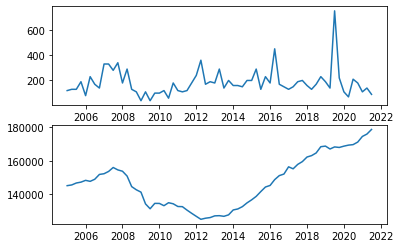

In [45]:
x = df_cov['date']
y1 = df_cov['DC_Total']
y2 = df_cov['real_median']
fig, (ax1,ax2) = plt.subplots(2,1)

ax1.plot(x,y1)
ax2.plot(x,y2)

plt.show()

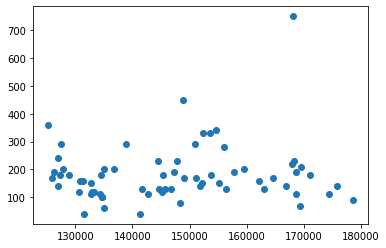

In [50]:
plt.scatter(y2,y1)

In [27]:
type(df.loc[1,'quarter'])

str